<>:94: SyntaxWarning: invalid escape sequence '\m'
<>:123: SyntaxWarning: invalid escape sequence '\m'
<>:94: SyntaxWarning: invalid escape sequence '\m'
<>:123: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Say70\AppData\Local\Temp\ipykernel_12004\4247139072.py:94: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Wavelength [$\mu$m]', fontsize=18)
C:\Users\Say70\AppData\Local\Temp\ipykernel_12004\4247139072.py:123: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Wavelength [$\mu$m]', fontsize=18)


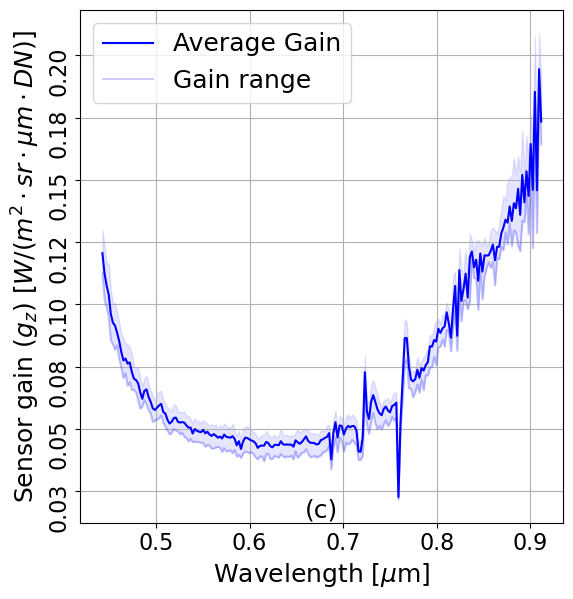

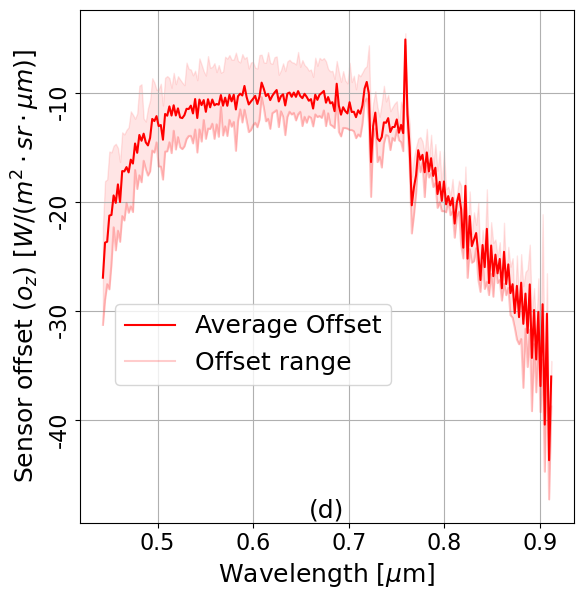

Average Gain Array: (210,)
Average Offset Array: (210,)


In [411]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_1 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/gain_offset_cubic_10am.csv'
file_path_2 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/gain_offset_cubic_1pm.csv'
file_path_3 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/gain_offset_cubic_4pm.csv'


# file_path_4 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/psr_gain_offset_cubic_10am.csv'
# file_path_5 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/psr_gain_offset_cubic_1pm.csv'
# file_path_6 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/psr_gain_offset_cubic_4pm.csv'


#output_directory = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/'
output_directory = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/'

# Read the CSV files into DataFrames
df_1 = pd.read_csv(file_path_1)
df_2 = pd.read_csv(file_path_2)
df_3 = pd.read_csv(file_path_3)

# df_4 = pd.read_csv(file_path_4)
# df_5 = pd.read_csv(file_path_5)
# df_6 = pd.read_csv(file_path_6)


# Remove 10 bands from both the top and bottom (excluding first 10 and last 10 rows)
df_1 = df_1.iloc[20:-40]
df_2 = df_2.iloc[20:-40]
df_3 = df_3.iloc[20:-40]


# df_4 = df_4.iloc[20:-40]
# df_5 = df_5.iloc[20:-40]
# df_6 = df_6.iloc[20:-40]

# Convert wavelength from nm to µm
df_1['Wavelength (µm)'] = df_1['Wavelength (nm)'] / 1000
df_2['Wavelength (µm)'] = df_2['Wavelength (nm)'] / 1000
df_3['Wavelength (µm)'] = df_3['Wavelength (nm)'] / 1000


# df_4['Wavelength (µm)'] = df_4['Wavelength (nm)'] / 1000
# df_5['Wavelength (µm)'] = df_5['Wavelength (nm)'] / 1000
# df_6['Wavelength (µm)'] = df_6['Wavelength (nm)'] / 1000

# Combine data for gain and offset calculations
wavelength = df_2['Wavelength (µm)'] # Assuming wavelengths are identical across datasets
gain_values = pd.concat([df_1['Gain (Cubic)'], df_2['Gain (Cubic)'], df_3['Gain (Cubic)']], axis=1)
offset_values = pd.concat([df_1['Offset (Cubic)'], df_2['Offset (Cubic)'], df_3['Offset (Cubic)']], axis=1)


# psr_gain_values = pd.concat([df_4['Gain (Cubic)'], df_5['Gain (Cubic)'], df_6['Gain (Cubic)']], axis=1)
# psr_offset_values = pd.concat([df_4['Offset (Cubic)'], df_5['Offset (Cubic)'], df_6['Offset (Cubic)']], axis=1)
# # gain_values = pd.concat([ df_2['Gain (Cubic)'], df_3['Gain (Cubic)'],], axis=1)
# # offset_values = pd.concat([df_2['Offset (Cubic)'], df_3['Offset (Cubic)']], axis=1)

# Calculate min, max, and average for gain and offset
gain_min = gain_values.min(axis=1)
gain_max = gain_values.max(axis=1)
gain_avg = gain_values.mean(axis=1)
offset_min = offset_values.min(axis=1)
offset_max = offset_values.max(axis=1)
offset_avg = offset_values.mean(axis=1)


# psr_gain_min = psr_gain_values.min(axis=1)
# psr_gain_max = psr_gain_values.max(axis=1)
# psr_gain_avg = psr_gain_values.mean(axis=1)
# psr_offset_min = psr_offset_values.min(axis=1)
# psr_offset_max = psr_offset_values.max(axis=1)
# psr_offset_avg = psr_offset_values.mean(axis=1)



# Convert average gain and offset to arrays
average_gain_array = gain_avg.values
average_offset_array = offset_avg.values


# psr_average_gain_array = psr_gain_avg.values
# psr_average_offset_array = psr_offset_avg.values

# Plot Wavelength vs Gain with min, max, and average
plt.figure(figsize=(6, 6))
plt.plot(wavelength, gain_avg, color='blue', label='Average Gain')
plt.plot(wavelength, gain_min, color='blue', alpha=0.2, label='Gain range')
plt.fill_between(wavelength, gain_min, gain_max, color='blue', alpha=0.1)  # Shaded area for range

# plt.plot(wavelength, psr_gain_avg, color='green', label='Average Gain')
# plt.plot(wavelength, psr_gain_min, color='green', alpha=0.2, label='Gain range')
# plt.fill_between(wavelength, psr_gain_min, psr_gain_max, color='green', alpha=0.1)  # Shaded area for range

plt.xlabel('Wavelength [$\mu$m]', fontsize=18)
plt.ylabel(r'$\text{Sensor gain}~(g_z) \ [W/(m^2 \cdot sr \cdot \mu m \cdot DN)]$', fontsize=18)
plt.legend(fontsize=18)
plt.grid(True)
plt.tight_layout()
# Increase tick label size
plt.tick_params(axis='both', labelsize=16)
plt.yticks(rotation=90)
plt.text(0.5, 0.001, '(c)', transform=plt.gca().transAxes, fontsize=18, 
         verticalalignment='bottom', horizontalalignment='center', color='black')


# Set decimal precision for tick labels
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
gain_plot_path = f'{output_directory}Wavelength_vs_Gain.png'
plt.savefig(gain_plot_path, dpi=1200)  # Save with high resolution
plt.show()

# Plot Wavelength vs Offset with min, max, and average
plt.figure(figsize=(6, 6))
plt.plot(wavelength, offset_avg, color='red', label='Average Offset')
plt.plot(wavelength, offset_min, color='red', alpha=0.2, label='Offset range')
plt.fill_between(wavelength, offset_min, offset_max, color='red', alpha=0.1)  # Shaded area for range

# plt.plot(wavelength, psr_offset_avg, color='cyan', label='Average Offset')
# plt.plot(wavelength, psr_offset_min, color='cyan', alpha=0.2, label='Offset range')
# plt.fill_between(wavelength, psr_offset_min, psr_offset_max, color='cyan', alpha=0.1)  # Shaded area for range


plt.xlabel('Wavelength [$\mu$m]', fontsize=18)
plt.ylabel(r'$\text{Sensor offset}~(o_z) \ [W/(m^2 \cdot sr \cdot \mu m)]$', fontsize=18)
#plt.legend(fontsize=18, bbox_to_anchor=(0.5, 0.09))
plt.legend(fontsize=18, bbox_to_anchor=(0.35, 0.45))
plt.grid(True)
plt.tight_layout()
# Increase tick label size
plt.tick_params(axis='both', labelsize=16)
plt.yticks(rotation=90)
plt.text(0.5, 0.001, '(d)', transform=plt.gca().transAxes, fontsize=18, 
         verticalalignment='bottom', horizontalalignment='center', color='black')

# Set decimal precision for tick labels
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.f'))
offset_plot_path = f'{output_directory}Wavelength_vs_Offset.png'
plt.savefig(offset_plot_path, dpi=1200)  # Save with high resolution
plt.show()


# Display the arrays
print("Average Gain Array:", average_gain_array.shape)
print("Average Offset Array:", average_offset_array.shape)


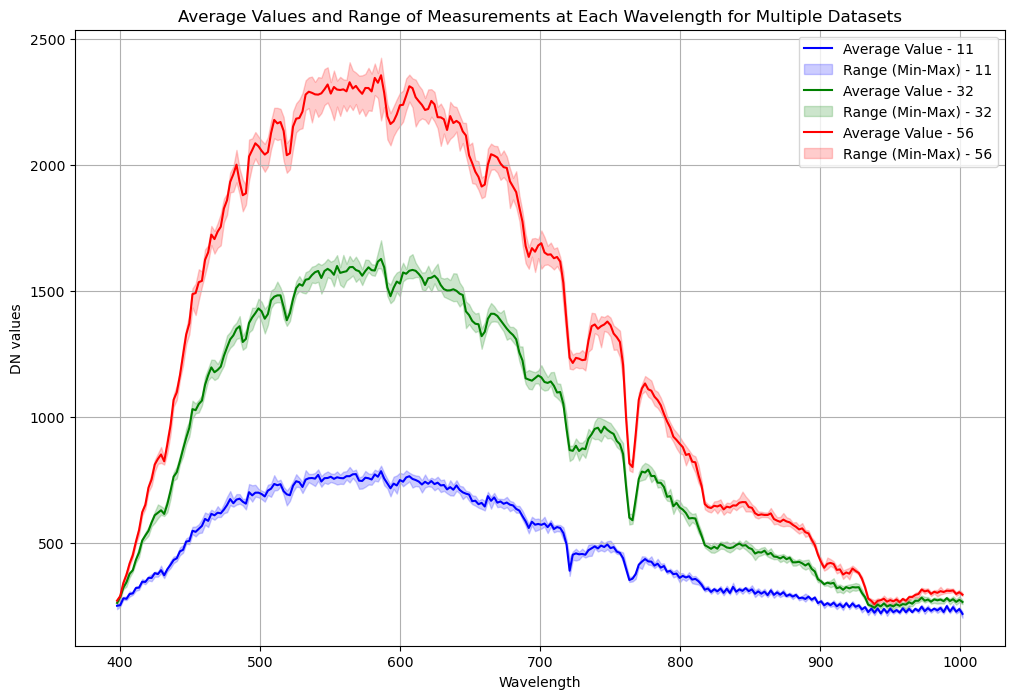

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File paths
file_paths = [
    'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/rawDN/30/1pm_30m_11.txt',
    'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/rawDN/30/1pm_30m_32.txt',
    'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/rawDN/30/1pm_30m_56.txt'
]

# Initialize lists to store data
wavelengths_list = []
average_values_list = []
max_values_list = []
min_values_list = []

# Process each file
for file_path in file_paths:
    # Read the data using pandas with updated parameter
    data = pd.read_csv(file_path, sep=r'\s+')
    
    # Rename columns to avoid issues like "Column.1", "Column.2"
    data.columns = [f'Column_{i+1}' for i in range(data.shape[1])]
    
    # Drop any columns with NaN values
    data = data.dropna(axis=1)
    
    # Calculate the average, max, and min values across all columns (excluding Column_1)
    average_values = data.iloc[:, 1:].mean(axis=1)
    max_values = data.iloc[:, 1:].max(axis=1)
    min_values = data.iloc[:, 1:].min(axis=1)
    wavelengths = data['Column_1']
    
    # wavelengths = data['Column_1'][25:-25].reset_index(drop=True)
    # average_values = data.iloc[:, 1:].mean(axis=1)[20:-30].reset_index(drop=True)
    # max_values = data.iloc[:, 1:].max(axis=1)[25:-25].reset_index(drop=True)
    # min_values = data.iloc[:, 1:].min(axis=1)[25:-25].reset_index(drop=True)
    
    # Store the results in lists
    wavelengths_list.append(np.array(wavelengths))
    average_values_list.append(np.array(average_values))
    max_values_list.append(np.array(max_values))
    min_values_list.append(np.array(min_values))

# Plot all datasets
plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'red']  # Colors for different datasets
labels = ['11', '32', '56']  # Labels for different datasets

for i in range(len(file_paths)):
    plt.plot(wavelengths_list[i], average_values_list[i], color=colors[i], label=f'Average Value - {labels[i]}')
    plt.fill_between(wavelengths_list[i], min_values_list[i], max_values_list[i], color=colors[i], alpha=0.2, label=f'Range (Min-Max) - {labels[i]}')

# Customize the plot
plt.xlabel('Wavelength')
plt.ylabel('DN values')
plt.title('Average Values and Range of Measurements at Each Wavelength for Multiple Datasets')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


In [412]:
import numpy as np
import matplotlib.pyplot as plt
import Py6S
from Py6S import *

# Initialize Py6S
s = Py6S.SixS()

# Define wavelengths
wavelengths = np.array(wavelengths_list[0]) * 1e-3

# Initialize lists to hold irradiance values
solar_irradiances_atmospheric = []

# Function to set up and run the simulation
def run_simulation(zenith, azimuth, atmospheric_profile, aerosol_profile=None, gas_absorption=None):
    s.geometry = Geometry.User()
    s.geometry.solar_z = zenith  # Set solar zenith angle
    s.geometry.solar_a = azimuth  # Set solar azimuth angle
    s.geometry.view_z = 0  # Set viewing zenith angle (0 for directly overhead)
    s.geometry.view_a = 0  # Set viewing azimuth angle
    s.atmos_profile = atmospheric_profile
    s.altitudes.set_sensor_custom_altitude(0.03)  # Sensor at ground level
    s.altitudes.set_target_sea_level()

    if aerosol_profile is not None:
        s.aerosols = aerosol_profile
    if gas_absorption is not None:
        s.gases = gas_absorption

    irradiance_values = []

    for wavelength in wavelengths:
        s.wavelength = Wavelength(wavelength)
        s.run()
        irradiance_values.append(s.outputs.diffuse_solar_irradiance)

    return irradiance_values

# Solar angles at different times
solar_angles = [
    (90-52.208845682026, 106.84977761202),  # At 10:30
    (90-73.214727727208, 179.1117845336),   # At 13:00
    (90-43.464829569984, 261.18327961148)   # At 16:15
]

# Run simulations for each set of angles
for zenith, azimuth in solar_angles:
    solar_irradiances_atmospheric.append(run_simulation(zenith, azimuth, 
                                                          AtmosProfile.PredefinedType(AtmosProfile.MidlatitudeSummer)))

# Function to replace NaN values with average of neighboring values
def fill_nan_with_average(data):
    data_array = np.array(data)
    # Create a mask for NaN values
    nan_mask = np.isnan(data_array)
    
    # Calculate the average of the neighboring values
    for i in range(len(data_array)):
        if nan_mask[i]:
            # Get the neighboring values
            neighbors = []
            if i > 0 and not nan_mask[i - 1]:
                neighbors.append(data_array[i - 1])  # Previous value
            if i < len(data_array) - 1 and not nan_mask[i + 1]:
                neighbors.append(data_array[i + 1])  # Next value
            
            # Replace NaN with the average of neighbors if available
            if neighbors:
                data_array[i] = np.mean(neighbors)
    
    return data_array



<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Say70\AppData\Local\Temp\ipykernel_12004\1937078735.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Wavelength [$\mu$m]", fontsize=18)


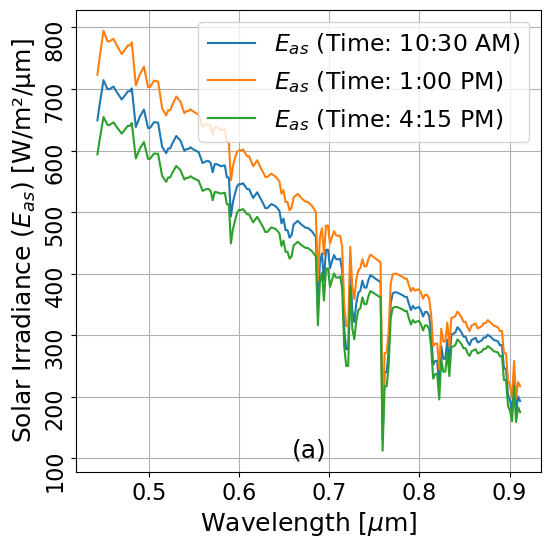

In [413]:
# Plotting results for each time
output_directory = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/'

plt.figure(figsize=(6, 6))
for idx, irradiance in enumerate(solar_irradiances_atmospheric):
    # Fill NaN values with the average of neighboring values
    filled_irradiance = fill_nan_with_average(irradiance)
    
    # Plot the filled values
    plt.plot(wavelengths, filled_irradiance, label=f"$E_{{as}}$ (Time: {['10:30 AM', '1:00 PM', '4:15 PM'][idx]})", color=f"C{idx}")

# Label the axes and title
plt.xlabel("Wavelength [$\mu$m]", fontsize=18)
plt.ylabel("Solar Irradiance ($E_{{as}}$) [W/m²/µm]", fontsize=18)
plt.yticks(rotation=90)
plt.text(0.5, 0.02, '(a)', transform=plt.gca().transAxes, fontsize=18, 
         verticalalignment='bottom', horizontalalignment='center', color='black')
# Customize legend and grid
plt.legend(fontsize=17)
plt.grid()

# Increase tick label size
plt.tick_params(axis='both', labelsize=16)

# Set decimal precision for tick labels
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.f'))

# Save the plot with high resolution
offset_plot_path = f'{output_directory}solar_irr.png'
plt.savefig(offset_plot_path, dpi=1200)  # Save with high resolution

# Show the plot
plt.show()


At 10:30: Azimuth = 106.84977761202, Zenith = 52.208845682026
At 13:0: Azimuth = 179.1117845336, Zenith = 73.214727727208
At 16:15: Azimuth = 261.18327961148, Zenith = 43.464829569984


<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Say70\AppData\Local\Temp\ipykernel_12004\3713700025.py:40: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Solar Azimuth $(\phi_i^\circ)$', fontsize=14)


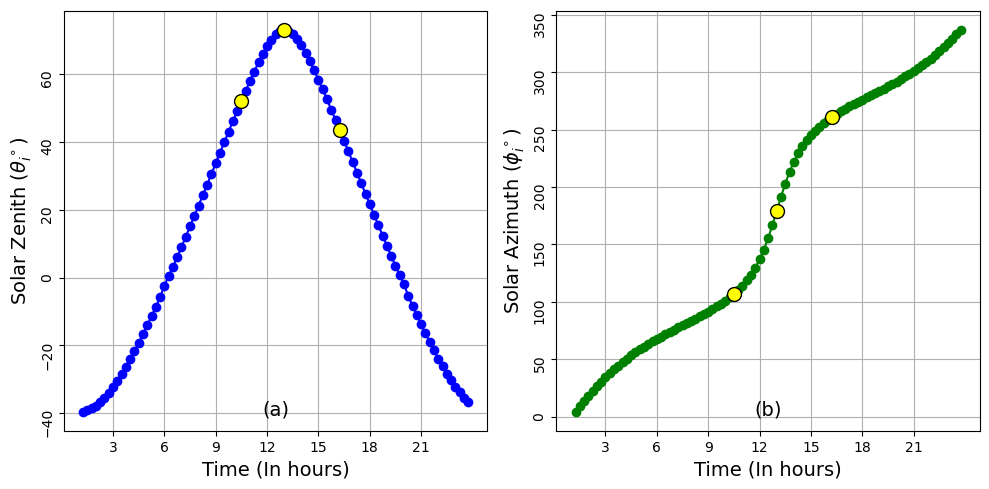

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/solarOrbit.csv'
output_directory = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/SPIE/GRSL/'

# Read the CSV file with semicolon as delimiter
data = pd.read_csv(file_path, delimiter=';')

# Extract each column into separate arrays
time_array = data['Time'].to_numpy()
zenith_array = data['Zenith'].to_numpy()
azimuth_array = data['Azimuth'].to_numpy()

# Create a figure and set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 3 columns

# Convert time_array to numerical values for custom ticks (assuming time in hh:mm format)
time_in_hours = [int(t.split(':')[0]) + int(t.split(':')[1]) / 60 for t in time_array]

# Plot Zenith vs. Time
axs[0].plot(time_in_hours[5:], zenith_array[5:], marker='o', linestyle='-', color='b')  
axs[0].set_xlabel('Time (In hours)', fontsize=14)
axs[0].set_ylabel('Solar Zenith $(\\theta_i^\\circ)$', fontsize=14)
axs[0].grid()
axs[0].tick_params(axis='x', rotation=0)  # Rotate x-axis labels
axs[0].tick_params(axis='y', rotation=90)  # Rotate x-axis labels
axs[0].text(0.5, 0.05, '(a)', transform=axs[0].transAxes, 
            ha='center', va='center', fontsize=14)



# Set custom x-ticks for the first plot
axs[0].set_xticks([0, 3, 6, 9, 12, 15, 18, 21])  # Set x-ticks

# Plot Azimuth vs. Time (removing the first five points)
axs[1].plot(time_in_hours[5:], azimuth_array[5:], marker='o', linestyle='-', color='g')  
axs[1].set_xlabel('Time (In hours)', fontsize=14)
axs[1].set_ylabel('Solar Azimuth $(\phi_i^\circ)$', fontsize=14)
axs[1].grid()
axs[1].tick_params(axis='x', rotation=0)  # Rotate x-axis labels
axs[1].tick_params(axis='y', rotation=90)  # Rotate x-axis labels
axs[1].text(0.5, 0.05, '(b)', transform=axs[1].transAxes, 
            ha='center', va='center', fontsize=14)


# Set custom x-ticks for the second plot
axs[1].set_xticks([0, 3, 6, 9, 12, 15, 18, 21])  # Set x-ticks


# # Plot Azimuth vs. Zenith
# axs[2].plot(azimuth_array[5:], zenith_array[5:], marker='o', linestyle='-', color='r')  
# axs[2].set_title('Azimuth vs. Zenith')
# axs[2].set_xlabel('Azimuth (degrees)')
# axs[2].set_ylabel('Zenith (degrees)')
# axs[2].grid()



# Find azimuth and zenith values at 10:00, 13:00, and 16:00
target_times = ['10:30', '13:0', '16:15']
highlight_times = []
highlight_zenith = []
highlight_azimuth = []

for target_time in target_times:
    if target_time in time_array:
        index = list(time_array).index(target_time)
        azimuth_value = azimuth_array[index]
        zenith_value = zenith_array[index]
        highlight_times.append(time_in_hours[index])  # Save the corresponding time in hours
        highlight_zenith.append(zenith_value)
        highlight_azimuth.append(azimuth_value)
        print(f"At {target_time}: Azimuth = {azimuth_value}, Zenith = {zenith_value}")
    else:
        print(f"{target_time} not found in data.")

# Mark the highlighted points on all three plots
for time_point, zenith_point, azimuth_point in zip(highlight_times, highlight_zenith, highlight_azimuth):
    axs[0].scatter(time_point, zenith_point, color='yellow', s=100, edgecolor='black', zorder=5)  # Zenith vs. Time
    axs[1].scatter(time_point, azimuth_point, color='yellow', s=100, edgecolor='black', zorder=5)  # Azimuth vs. Time
    #axs[2].scatter(azimuth_point, zenith_point, color='yellow', s=100, edgecolor='black', zorder=5)  # Azimuth vs. Zenith

# Adjust layout to make room for labels
plt.tight_layout()

# offset_plot_path = f'{output_directory}solar_ang.png'
# plt.savefig(offset_plot_path, dpi=600)  # Save with high resolution

# Show the plot
plt.show()



At 10:30: Azimuth = 106.84977761202, Zenith = 52.208845682026
At 13:0: Azimuth = 179.1117845336, Zenith = 73.214727727208
At 16:15: Azimuth = 261.18327961148, Zenith = 43.464829569984


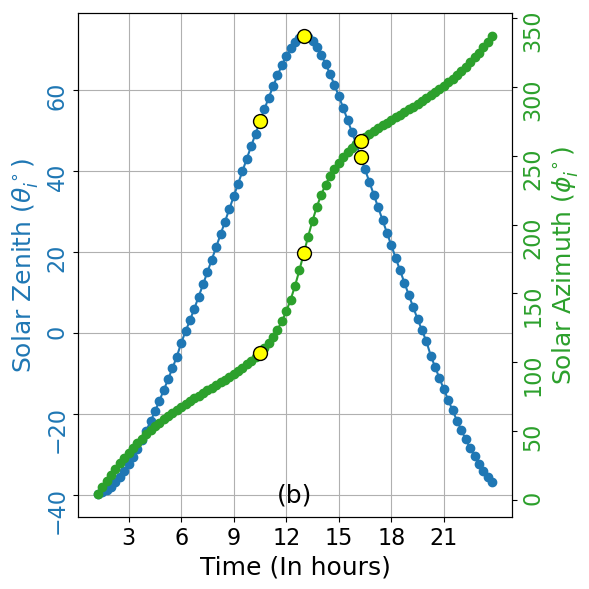

In [410]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/solarOrbit.csv'
output_directory = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/'

# Read the CSV file with semicolon as delimiter
data = pd.read_csv(file_path, delimiter=';')

# Extract each column into separate arrays
time_array = data['Time'].to_numpy()
zenith_array = data['Zenith'].to_numpy()
azimuth_array = data['Azimuth'].to_numpy()

# Convert time_array to numerical values for custom ticks (assuming time in hh:mm format)
time_in_hours = [int(t.split(':')[0]) + int(t.split(':')[1]) / 60 for t in time_array]

# Create a figure
fig, ax1 = plt.subplots(figsize=(6, 6))

# Plot Zenith vs. Time on the primary y-axis
color_zenith = 'tab:blue'
ax1.plot(time_in_hours[5:], zenith_array[5:], marker='o', linestyle='-', color=color_zenith, label='Zenith')
ax1.set_xlabel('Time (In hours)', fontsize=18)
ax1.set_ylabel('Solar Zenith $(\\theta_i^\\circ)$', color=color_zenith, fontsize=18)
ax1.tick_params(axis='y', labelcolor=color_zenith, labelsize=16)
ax1.tick_params(axis='y',rotation=90)
ax1.tick_params(axis='x', labelsize=16)
ax1.grid()

# Add custom x-ticks
ax1.set_xticks([0, 3, 6, 9, 12, 15, 18, 21])

# Create a secondary y-axis for Azimuth
ax2 = ax1.twinx()
color_azimuth = 'tab:green'
ax2.plot(time_in_hours[5:], azimuth_array[5:], marker='o', linestyle='-', color=color_azimuth, label='Azimuth')
ax2.set_ylabel('Solar Azimuth $(\\phi_i^\\circ)$', color=color_azimuth, fontsize=18)
ax2.tick_params(axis='y', labelcolor=color_azimuth, labelsize=16)
ax2.tick_params(rotation=90)
# Add the text "(a)" to the plot
ax1.text(0.5, 0.02, '(b)', transform=ax1.transAxes, fontsize=18, 
         verticalalignment='bottom', horizontalalignment='center', color='black')
# Highlight specific points for both Zenith and Azimuth
target_times = ['10:30', '13:0', '16:15']
highlight_times = []
highlight_zenith = []
highlight_azimuth = []

for target_time in target_times:
    if target_time in time_array:
        index = list(time_array).index(target_time)
        azimuth_value = azimuth_array[index]
        zenith_value = zenith_array[index]
        highlight_times.append(time_in_hours[index])  # Save the corresponding time in hours
        highlight_zenith.append(zenith_value)
        highlight_azimuth.append(azimuth_value)
        print(f"At {target_time}: Azimuth = {azimuth_value}, Zenith = {zenith_value}")
    else:
        print(f"{target_time} not found in data.")

for time_point, zenith_point, azimuth_point in zip(highlight_times, highlight_zenith, highlight_azimuth):
    ax1.scatter(time_point, zenith_point, color='yellow', s=100, edgecolor='black', zorder=5)  # Highlight Zenith
    ax2.scatter(time_point, azimuth_point, color='yellow', s=100, edgecolor='black', zorder=5)  # Highlight Azimuth

# Adjust layout
fig.tight_layout()

# Save the plot
offset_plot_path = f'{output_directory}solar_ang_combined.png'
plt.savefig(offset_plot_path, dpi=1200)  # Save with high resolution

# Show the plot
plt.show()


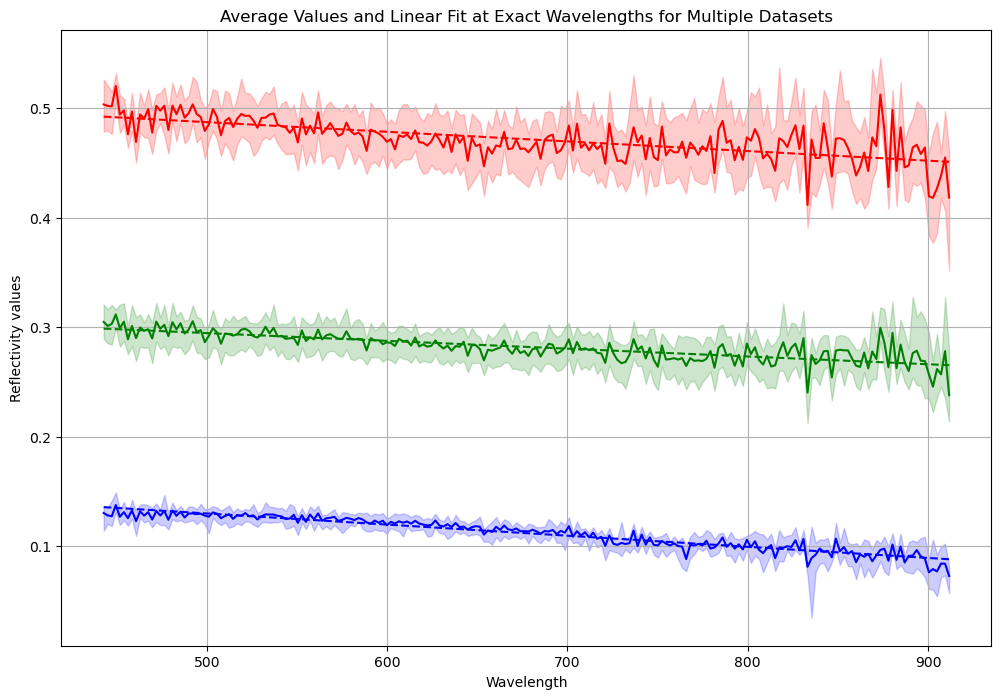

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File paths
file_paths = [
    'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/rawDN/30/ref_10am_11.txt',
    'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/rawDN/30/ref_10am_32.txt',
    'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/rawDN/30/ref_10am_56.txt'
]

# Initialize lists to store data
wavelengths_list = []
average_ref_values_list = []
max_ref_values_list = []
min_ref_values_list = []
linear_fits_list = []  # To store linear fit values

# Process each file
for file_path in file_paths:
    # Read the data using pandas with updated parameter
    data = pd.read_csv(file_path, sep=r'\s+')
    
    # Rename columns to avoid issues like "Column.1", "Column.2"
    data.columns = [f'Column_{i+1}' for i in range(data.shape[1])]
    
    # Drop any columns with NaN values
    data = data.dropna(axis=1)
    
    # Calculate the average, max, and min values across all columns (excluding Column_1)
    average_ref_values = data.iloc[:, 1:].mean(axis=1)
    max_ref_values = data.iloc[:, 1:].max(axis=1)
    min_ref_values = data.iloc[:, 1:].min(axis=1)
    wavelengths = data['Column_1']

     # Remove the first 20 and last 40 values
    wavelengths = wavelengths[20:-40]
    average_ref_values = average_ref_values[20:-40]
    max_ref_values = max_ref_values[20:-40]
    min_ref_values = min_ref_values[20:-40]
    
    # Store the results in lists
    wavelengths_list.append(np.array(wavelengths))
    average_ref_values_list.append(np.array(average_ref_values))
    max_ref_values_list.append(np.array(max_ref_values))
    min_ref_values_list.append(np.array(min_ref_values))

    # Perform linear regression
    coeffs = np.polyfit(wavelengths, average_ref_values, 1)  # 1 for linear fit
    linear_fit = np.polyval(coeffs, wavelengths)  # Calculate linear fit values at the wavelengths
    linear_fits_list.append(linear_fit)

# Optional: Plot all datasets with linear fits
plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'red']  # Colors for different datasets
labels = ['Dataset 1', 'Dataset 2', 'Dataset 3']  # Labels for different datasets

for i in range(len(file_paths)):
    # Plot original data
    plt.plot(wavelengths_list[i], average_ref_values_list[i], color=colors[i], label=f'Average ref values - {labels[i]}')
    plt.fill_between(wavelengths_list[i], min_ref_values_list[i], max_ref_values_list[i], color=colors[i], alpha=0.2, label=f'Range (Min-Max) - {labels[i]}')
    
    # Plot the linear regression line
    plt.plot(wavelengths_list[i], linear_fits_list[i], color=colors[i], linestyle='--', label=f'Linear fit - {labels[i]}')

# Customize the plot
plt.xlabel('Wavelength')
plt.ylabel('Reflectivity values')
plt.title('Average Values and Linear Fit at Exact Wavelengths for Multiple Datasets')
plt.grid(True)

# Show the plot
plt.show()


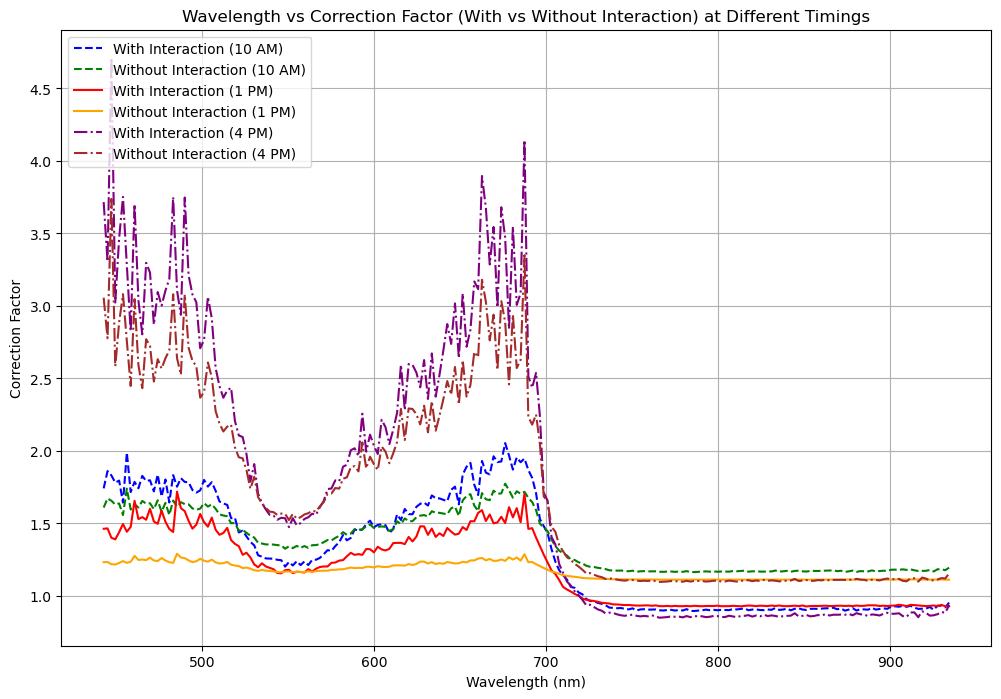

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for different timings
csv_file_path_1 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/correction_factors_comparison_veg_10am.csv'
csv_file_path_2 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/correction_factors_comparison_veg_1pm.csv'
csv_file_path_3 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/correction_factors_comparison_veg_4pm.csv'

# Read the CSV data into DataFrames
df_1 = pd.read_csv(csv_file_path_1)
df_2 = pd.read_csv(csv_file_path_2)
df_3 = pd.read_csv(csv_file_path_3)

# Extract columns for each dataset
wavelengths_1 = df_1['Wavelength (nm)']
wavelengths_2 = df_2['Wavelength (nm)']
wavelengths_3 = df_3['Wavelength (nm)']

correction_factors_with_1 = df_1['Correction Factor (With Interaction)']
correction_factors_without_1 = df_1['Correction Factor (Without Interaction)']

correction_factors_with_2 = df_2['Correction Factor (With Interaction)']
correction_factors_without_2 = df_2['Correction Factor (Without Interaction)']

correction_factors_with_3 = df_3['Correction Factor (With Interaction)']
correction_factors_without_3 = df_3['Correction Factor (Without Interaction)']

# Plot the correction factors comparison for each time
plt.figure(figsize=(12, 8))

# 10 AM
plt.plot(wavelengths_1, correction_factors_with_1, label='With Interaction (10 AM)', color='blue', linestyle='--')
plt.plot(wavelengths_1, correction_factors_without_1, label='Without Interaction (10 AM)', color='green', linestyle='--')

# 1 PM
plt.plot(wavelengths_2, correction_factors_with_2, label='With Interaction (1 PM)', color='red', linestyle='-')
plt.plot(wavelengths_2, correction_factors_without_2, label='Without Interaction (1 PM)', color='orange', linestyle='-')

# 4 PM
plt.plot(wavelengths_3, correction_factors_with_3, label='With Interaction (4 PM)', color='purple', linestyle='-.')
plt.plot(wavelengths_3, correction_factors_without_3, label='Without Interaction (4 PM)', color='brown', linestyle='-.')

# Add labels and title
plt.xlabel('Wavelength (nm)')
plt.ylabel('Correction Factor')
plt.title('Wavelength vs Correction Factor (With vs Without Interaction) at Different Timings')
plt.legend(loc='upper left')
plt.grid(True)

# Display the plot
plt.show()


In [70]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define the CSV file paths
# csv_file_path_1r = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/Reflect_comparison_veg_10am.csv'
# csv_file_path_2r = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/Reflect_comparison_veg_1pm.csv'
# csv_file_path_3r = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/Reflect_comparison_veg_4pm.csv'

# # Read the CSV data into DataFrames
# dfr_1 = pd.read_csv(csv_file_path_1r)
# dfr_2 = pd.read_csv(csv_file_path_2r)
# dfr_3 = pd.read_csv(csv_file_path_3r)

# # Extract columns from each DataFrame
# wavelengths_1r = dfr_1['Wavelength (nm)']
# observed_reflect_1r = dfr_1['Observed reflect']
# brdf_with_interaction_1r = dfr_1['BRDF reflect(With Interaction)']
# brdf_without_interaction_1r = dfr_1['BRDF reflect (Without Interaction)']

# wavelengths_2r = dfr_2['Wavelength (nm)']
# observed_reflect_2r = dfr_2['Observed reflect']
# brdf_with_interaction_2r = dfr_2['BRDF reflect(With Interaction)']
# brdf_without_interaction_2r = dfr_2['BRDF reflect (Without Interaction)']

# wavelengths_3r = dfr_3['Wavelength (nm)']
# observed_reflect_3r = dfr_3['Observed reflect']
# brdf_with_interaction_3r = dfr_3['BRDF reflect(With Interaction)']
# brdf_without_interaction_3r = dfr_3['BRDF reflect (Without Interaction)']


# # Define the file paths for different timings
# csv_file_path_1 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/correction_factors_comparison_veg_10am.csv'
# csv_file_path_2 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/correction_factors_comparison_veg_1pm.csv'
# csv_file_path_3 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/correction_factors_comparison_veg_4pm.csv'

# # Read the CSV data into DataFrames
# df_1 = pd.read_csv(csv_file_path_1)
# df_2 = pd.read_csv(csv_file_path_2)
# df_3 = pd.read_csv(csv_file_path_3)

# # Extract columns for each dataset
# wavelengths_1 = df_1['Wavelength (nm)']
# wavelengths_2 = df_2['Wavelength (nm)']
# wavelengths_3 = df_3['Wavelength (nm)']

# correction_factors_with_1 = df_1['Correction Factor (With Interaction)']*(dfr_2['BRDF reflect(With Interaction)']/dfr_1['BRDF reflect(With Interaction)'])
# correction_factors_without_1 = df_1['Correction Factor (Without Interaction)']*(dfr_2['BRDF reflect(Without Interaction)']/dfr_1['BRDF reflect(Without Interaction)'])

# correction_factors_with_2 = df_2['Correction Factor (With Interaction)']
# correction_factors_without_2 = df_2['Correction Factor (Without Interaction)']

# correction_factors_with_3 = df_3['Correction Factor (With Interaction)']*(dfr_2['BRDF reflect(With Interaction)']/dfr_3['BRDF reflect(With Interaction)'])
# correction_factors_without_3 = df_3['Correction Factor (Without Interaction)']*(dfr_2['BRDF reflect(Without Interaction)']/dfr_3['BRDF reflect(Without Interaction)'])


# # Create subplots: two subplots, one for "With Interaction" and one for "Without Interaction"
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Plotting the "With Interaction" on the first subplot
# axes[0].plot(wavelengths_1, correction_factors_with_1, label='10 AM', color='blue', linestyle='--')
# axes[0].plot(wavelengths_2, correction_factors_with_2, label='1 PM', color='red', linestyle='-')
# axes[0].plot(wavelengths_3, correction_factors_with_3, label='4 PM', color='purple', linestyle='-.')
# axes[0].set_xlabel('Wavelength (nm)')
# axes[0].set_ylabel('Correction Factor')
# axes[0].set_title('Correction Factor (With Interaction)')
# axes[0].legend(loc='upper left')
# axes[0].grid(True)

# # Plotting the "Without Interaction" on the second subplot
# axes[1].plot(wavelengths_1, correction_factors_without_1, label='10 AM', color='green', linestyle='--')
# axes[1].plot(wavelengths_2, correction_factors_without_2, label='1 PM', color='orange', linestyle='-')
# axes[1].plot(wavelengths_3, correction_factors_without_3, label='4 PM', color='brown', linestyle='-.')
# axes[1].set_xlabel('Wavelength (nm)')
# axes[1].set_ylabel('Correction Factor')
# axes[1].set_title('Correction Factor (Without Interaction)')
# axes[1].legend(loc='upper left')
# axes[1].grid(True)

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Display the plot
# plt.show()


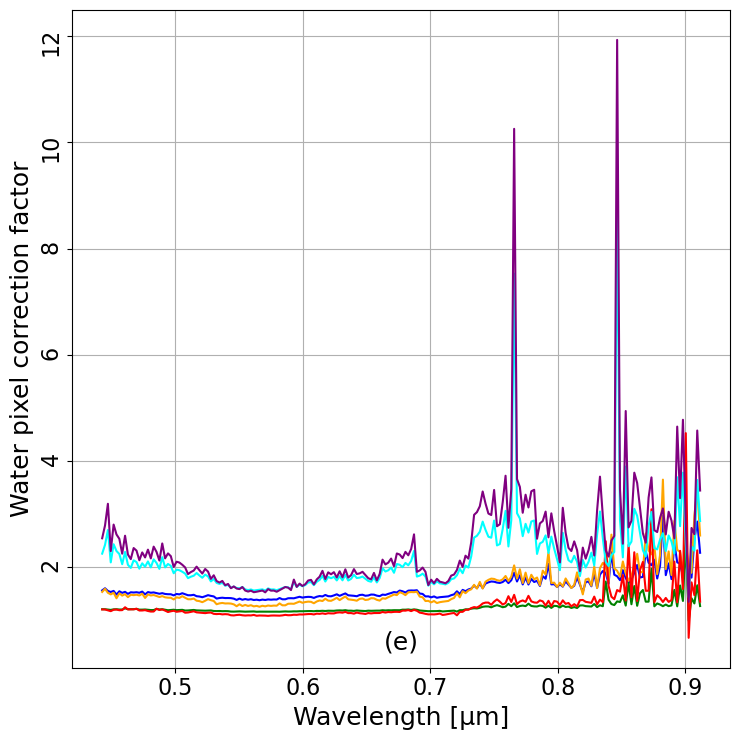

In [427]:
import pandas as pd
import matplotlib.pyplot as plt

# Define CSV file paths for reflectance data
reflectance_csv_10am = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/Reflect_comparison_water_10am.csv'
reflectance_csv_1pm = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/Reflect_comparison_water_1pm.csv'
reflectance_csv_4pm = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/Reflect_comparison_water_4pm.csv'

# Read reflectance data into DataFrames
dfr_10am = pd.read_csv(reflectance_csv_10am)
dfr_1pm = pd.read_csv(reflectance_csv_1pm)
dfr_4pm = pd.read_csv(reflectance_csv_4pm)

# Define CSV file paths for correction factors
correction_csv_10am = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/correction_factors_comparison_water_10am.csv'
correction_csv_1pm = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/correction_factors_comparison_water_1pm.csv'
correction_csv_4pm = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/correction_factors_comparison_water_4pm.csv'

# Read correction factor data into DataFrames
df_10am = pd.read_csv(correction_csv_10am)
df_1pm = pd.read_csv(correction_csv_1pm)
df_4pm = pd.read_csv(correction_csv_4pm)

# # Calculate adjusted correction factors for 10 AM and 4 PM
# correction_factors_with_10am = df_10am['Correction Factor (With Interaction)'] * (dfr_1pm['BRDF reflect (With Interaction)'] / dfr_10am['BRDF reflect (With Interaction)']).fillna(1)
# correction_factors_without_10am = df_10am['Correction Factor (Without Interaction)'] * (dfr_1pm['BRDF reflect (Without Interaction)'] / dfr_10am['BRDF reflect (Without Interaction)']).fillna(1)

# correction_factors_with_4pm = df_4pm['Correction Factor (With Interaction)'] * (dfr_1pm['BRDF reflect (With Interaction)'] / dfr_4pm['BRDF reflect (With Interaction)']).fillna(1)
# correction_factors_without_4pm = df_4pm['Correction Factor (Without Interaction)'] * (dfr_1pm['BRDF reflect (Without Interaction)'] / dfr_4pm['BRDF reflect (Without Interaction)']).fillna(1)

# # Original correction factors for 1 PM
# correction_factors_with_1pm = df_1pm['Correction Factor (With Interaction)']
# correction_factors_without_1pm = df_1pm['Correction Factor (Without Interaction)']



# # Calculate adjusted correction factors for 10 AM and 4 PM
# correction_factors_with_10am = df_10am['Correction Factor (With Interaction)'] * (dfr_1pm['Predicted Standard (With Interaction)'] / dfr_10am['Predicted Standard (With Interaction)']).fillna(1)
# correction_factors_without_10am = df_10am['Correction Factor (Without Interaction)'] * (dfr_1pm['Predicted Standard (Without Interaction)'] / dfr_10am['Predicted Standard (Without Interaction)']).fillna(1)

# correction_factors_with_4pm = df_4pm['Correction Factor (With Interaction)'] * (dfr_1pm['Predicted Standard (With Interaction)'] / dfr_4pm['Predicted Standard (With Interaction)']).fillna(1)
# correction_factors_without_4pm = df_4pm['Correction Factor (Without Interaction)'] * (dfr_1pm['Predicted Standard (Without Interaction)'] / dfr_4pm['Predicted Standard (Without Interaction)']).fillna(1)

# # Original correction factors for 1 PM
# correction_factors_with_1pm = df_1pm['Correction Factor (With Interaction)']  * (dfr_1pm['Predicted Standard (With Interaction)'] / dfr_1pm['Predicted Standard (With Interaction)']).fillna(1)
# correction_factors_without_1pm = df_1pm['Correction Factor (Without Interaction)'] * (dfr_1pm['Predicted Standard (Without Interaction)'] / dfr_1pm['Predicted Standard (Without Interaction)']).fillna(1)


# # Calculate adjusted correction factors for 10 AM and 4 PM
# correction_factors_with_10am = df_10am['Correction Factor (With Interaction)'] * (dfr_1pm['Predicted Standard (With Interaction)'] / dfr_10am['Predicted Standard (With Interaction)']).fillna(1)
# correction_factors_without_10am = df_10am['Correction Factor (Without Interaction)'] * (dfr_1pm['Predicted Standard (Without Interaction)'] / dfr_10am['Predicted Standard (Without Interaction)']).fillna(1)

# correction_factors_with_4pm = df_4pm['Correction Factor (With Interaction)'] * (dfr_1pm['Predicted Standard (With Interaction)'] / dfr_4pm['Predicted Standard (With Interaction)']).fillna(1)
# correction_factors_without_4pm = df_4pm['Correction Factor (Without Interaction)'] * (dfr_1pm['Predicted Standard (Without Interaction)'] / dfr_4pm['Predicted Standard (Without Interaction)']).fillna(1)

# # Original correction factors for 1 PM
# correction_factors_with_1pm = df_1pm['Correction Factor (With Interaction)']  * (dfr_1pm['Predicted Standard (With Interaction)'] / dfr_1pm['Predicted Standard (With Interaction)']).fillna(1)
# correction_factors_without_1pm = df_1pm['Correction Factor (Without Interaction)'] * (dfr_1pm['Predicted Standard (Without Interaction)'] / dfr_1pm['Predicted Standard (Without Interaction)']).fillna(1)



# Calculate adjusted correction factors for 10 AM and 4 PM
correction_factors_with_10am = df_10am['Correction Factor (With Interaction)'] #* (dfr_1pm['Predicted Standard (With Interaction)'] / dfr_10am['Predicted Standard (With Interaction)']).fillna(1)
correction_factors_without_10am = df_10am['Correction Factor (Without Interaction)'] #* (dfr_1pm['Predicted Standard (Without Interaction)'] / dfr_10am['Predicted Standard (Without Interaction)']).fillna(1)

correction_factors_with_4pm = df_4pm['Correction Factor (With Interaction)'] #* (dfr_1pm['Predicted Standard (With Interaction)'] / dfr_4pm['Predicted Standard (With Interaction)']).fillna(1)
correction_factors_without_4pm = df_4pm['Correction Factor (Without Interaction)'] #* (dfr_1pm['Predicted Standard (Without Interaction)'] / dfr_4pm['Predicted Standard (Without Interaction)']).fillna(1)

# Original correction factors for 1 PM
correction_factors_with_1pm = df_1pm['Correction Factor (With Interaction)']  #* (dfr_1pm['Predicted Standard (With Interaction)'] / dfr_1pm['Predicted Standard (With Interaction)']).fillna(1)
correction_factors_without_1pm = df_1pm['Correction Factor (Without Interaction)'] #* (dfr_1pm['Predicted Standard (Without Interaction)'] / dfr_1pm['Predicted Standard (Without Interaction)']).fillna(1)


def smooth_data(x, y, smoothing_factor=0.0):
    spline = UnivariateSpline(x, y, s=smoothing_factor)
    return x, spline(x)

# Plotting
plt.figure(figsize=(7.5, 7.5))


# Plot "With Interaction" correction factors
x, y = smooth_data(df_4['Wavelength (µm)'], correction_factors_without_10am[:-10])
plt.plot(x, y, label='10:30 AM (RTLS)', color='blue', linestyle='-')
x, y = smooth_data(df_4['Wavelength (µm)'], correction_factors_with_10am[:-10])
plt.plot(x, y, label='10:30 AM (mRTLS)', color='orange', linestyle='-')


x, y = smooth_data(df_4['Wavelength (µm)'], correction_factors_without_1pm[:-10])
plt.plot(x, y, label='1 PM (RTLS)', color='green', linestyle='-')
x, y = smooth_data(df_4['Wavelength (µm)'], correction_factors_with_1pm[:-10])
plt.plot(x, y, label='1 PM (mRTLS)', color='red', linestyle='-')


x, y = smooth_data(df_4['Wavelength (µm)'], correction_factors_without_4pm[:-10])
plt.plot(x, y, label='4:15 PM (RTLS)', color='cyan', linestyle='-')
x, y = smooth_data(df_4['Wavelength (µm)'], correction_factors_with_4pm[:-10])
plt.plot(x, y, label='4:15 PM (mRTLS)', color='purple', linestyle='-')

# Set labels and title
plt.xlabel('Wavelength [µm]', fontsize = '18')
plt.ylabel('Water pixel correction factor', fontsize = '18')



# Increase tick label size
plt.tick_params(axis='both', labelsize=16)
plt.yticks(rotation=90)

# Add legend
#plt.legend(loc='upper right',fontsize = '18' )

# Enable grid
plt.grid(True)
plt.text(0.5, 0.02, '(e)', transform=plt.gca().transAxes, fontsize=18, 
         verticalalignment='bottom', horizontalalignment='center', color='black')

# Show the plot
plt.tight_layout()

output_directory = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/'

plt.savefig(f'{output_directory}CF_water.png', dpi=1200)  # Save EPS without transparency

plt.show()

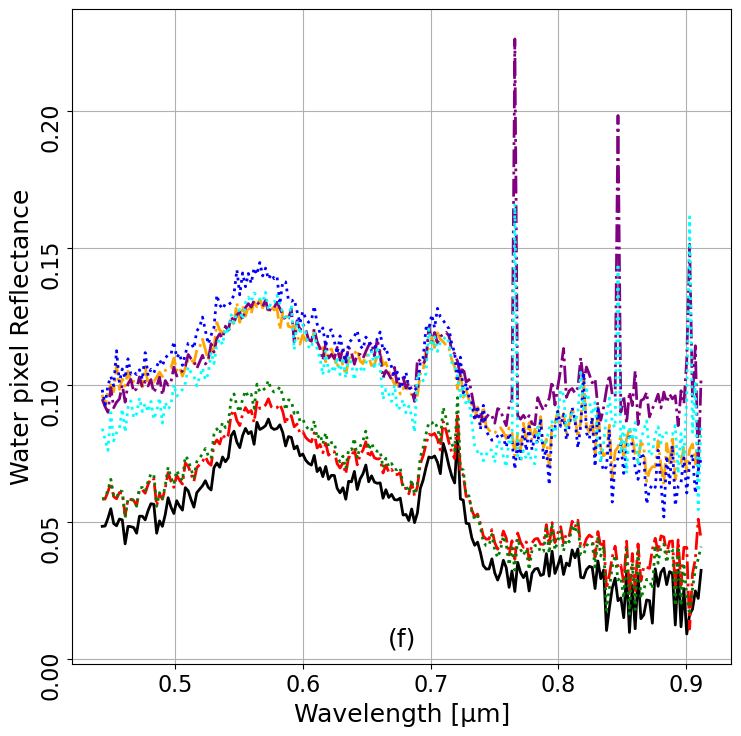

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.linear_model import LinearRegression

# Define the CSV file paths
csv_file_path_1 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/Reflect_comparison_water_10am.csv'
csv_file_path_2 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/Reflect_comparison_water_1pm.csv'
csv_file_path_3 = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/Reflect_comparison_water_4pm.csv'

# Read the CSV data into DataFrames
df_1 = pd.read_csv(csv_file_path_1)
df_2 = pd.read_csv(csv_file_path_2)
df_3 = pd.read_csv(csv_file_path_3)

# Extract columns from each DataFrame
wavelengths_1 = df_4['Wavelength (µm)']
observed_reflect_1 = df_1['Observed reflect']
brdf_with_interaction_1 = observed_reflect_1 * correction_factors_with_10am
brdf_without_interaction_1 = observed_reflect_1 * correction_factors_without_10am

wavelengths_2 = df_4['Wavelength (µm)']
observed_reflect_2 = df_2['Observed reflect']
brdf_with_interaction_2 = observed_reflect_2 * correction_factors_with_1pm
brdf_without_interaction_2 = observed_reflect_2 * correction_factors_without_1pm

wavelengths_3 = df_4['Wavelength (µm)']
observed_reflect_3 = df_3['Observed reflect']
brdf_with_interaction_3 = observed_reflect_3 * correction_factors_with_4pm
brdf_without_interaction_3 = observed_reflect_3 * correction_factors_without_4pm


# def smooth_data(x, y, smoothing_factor=0.1):
#     # Create cubic spline interpolation without smoothing factor directly
#     spline = CubicSpline(x, y, bc_type='natural')
#     return x, spline(x)

def smooth_data(x, y, smoothing_factor=0.00):
    spline = UnivariateSpline(x, y, s=smoothing_factor)
    return x, spline(x)

# Plot the data from all three CSVs
plt.figure(figsize=(8.5, 8.5))


# 1 PM Data
x, y = smooth_data(wavelengths_2, observed_reflect_2[:-10])
plt.plot(x, y, label='$R_o$ (Observed)', color='black', linestyle='-', linewidth=2)


# 10 AM Data
x, y = smooth_data(wavelengths_1, brdf_with_interaction_1[:-10])
plt.plot(x, y, label='$R_c$ mRTLS (10:30 AM)', color='orange', linestyle='-.', linewidth=2)  # Medium blue
# 1 PM Data
x, y = smooth_data(wavelengths_2, brdf_with_interaction_2[:-10])
plt.plot(x, y, label='$R_c$ mRTLS (1 PM)', color='red', linestyle='-.', linewidth=2)
# 4 PM Data
x, y = smooth_data(wavelengths_3, brdf_with_interaction_3[:-10])
plt.plot(x, y, label='$R_c$ mRTLS (4:15 PM)', color='purple', linestyle='-.', linewidth=2)




# 10 AM Data
x, y = smooth_data(wavelengths_1, brdf_without_interaction_1[:-10])
plt.plot(x, y, label='$R_c$ RTLS (10:30 AM)', color='blue', linestyle=':', linewidth=2)  # Dark blue
# 1 PM Data
x, y = smooth_data(wavelengths_2, brdf_without_interaction_2[:-10])
plt.plot(x, y, label='$R_c$ RTLS (1 PM)', color='green', linestyle=':', linewidth=2)
# 4 PM Data
x, y = smooth_data(wavelengths_3, brdf_without_interaction_3[:-10])
plt.plot(x, y, label='$R_c$ RTLS (4:15 PM)', color='cyan', linestyle=':', linewidth=2)






# Add labels and title
plt.xlabel('Wavelength [µm]', fontsize=18)
plt.ylabel('Water pixel Reflectance', fontsize=18)
#plt.legend(fontsize=14)
#plt.ylim(0, 0.15)
plt.text(0.5, 0.02, '(f)', transform=plt.gca().transAxes, fontsize=18, 
         verticalalignment='bottom', horizontalalignment='center', color='black')
# Show legend
#plt.legend(loc='upper left', fontsize=18)
plt.tick_params(axis='both', labelsize=16)
plt.yticks(rotation=90)

# Add grid for readability
plt.grid(True)
output_directory = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/'
offset_plot_path = f'{output_directory}RTLS_water_smooth.png'
plt.savefig(offset_plot_path, dpi=1200)  # Save with high resolution
#Display the plot
plt.show()


C:\Users\Say70\AppData\Local\Temp\ipykernel_12004\1639184500.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


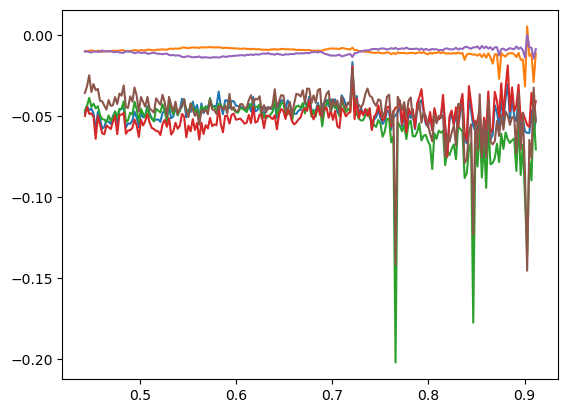

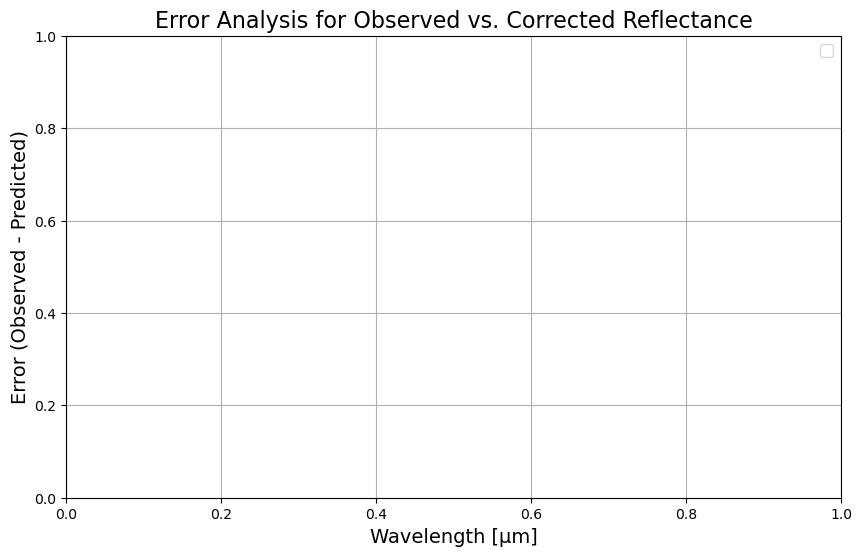

Error Metrics Summary:
10:30 AM (mRTLS): MAE = 0.0481, RMSE = 0.0487, MBE = -0.0481
1 PM (mRTLS): MAE = 0.0101, RMSE = 0.0105, MBE = -0.0101
4:15 PM (mRTLS): MAE = 0.0551, RMSE = 0.0583, MBE = -0.0551
10:30 AM (RTLS): MAE = 0.0506, RMSE = 0.0512, MBE = -0.0506
1 PM (RTLS): MAE = 0.0105, RMSE = 0.0107, MBE = -0.0105
4:15 PM (RTLS): MAE = 0.0471, RMSE = 0.0494, MBE = -0.0471


In [429]:
import numpy as np

# Error metrics functions
def calculate_errors(observed, predicted):
    errors = observed - predicted
    mae = np.mean(np.abs(errors))
    rmse = np.sqrt(np.mean(errors**2))
    mbe = np.mean(errors)
    return errors, mae, rmse, mbe

# Error analysis
datasets = {
    "10:30 AM (mRTLS)": brdf_with_interaction_1[:-10],
    "1 PM (mRTLS)": brdf_with_interaction_2[:-10],
    "4:15 PM (mRTLS)": brdf_with_interaction_3[:-10],
    "10:30 AM (RTLS)": brdf_without_interaction_1[:-10],
    "1 PM (RTLS)": brdf_without_interaction_2[:-10],
    "4:15 PM (RTLS)": brdf_without_interaction_3[:-10],
}

# Calculate errors and store metrics
error_metrics = {}

for label, predicted in datasets.items():
    errors, mae, rmse, mbe = calculate_errors(observed_reflect_2[:-10], predicted)
    error_metrics[label] = {"MAE": mae, "RMSE": rmse, "MBE": mbe}
    plt.plot(wavelengths_2, errors, label=f"Error ({label})")

# Plot error curves
plt.figure(figsize=(10, 6))
plt.xlabel("Wavelength [µm]", fontsize=14)
plt.ylabel("Error (Observed - Predicted)", fontsize=14)
plt.title("Error Analysis for Observed vs. Corrected Reflectance", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig(f"{output_directory}error_analysis.png", dpi=600)
plt.show()

# Print error metrics
print("Error Metrics Summary:")
for label, metrics in error_metrics.items():
    print(f"{label}: MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}, MBE = {metrics['MBE']:.4f}")


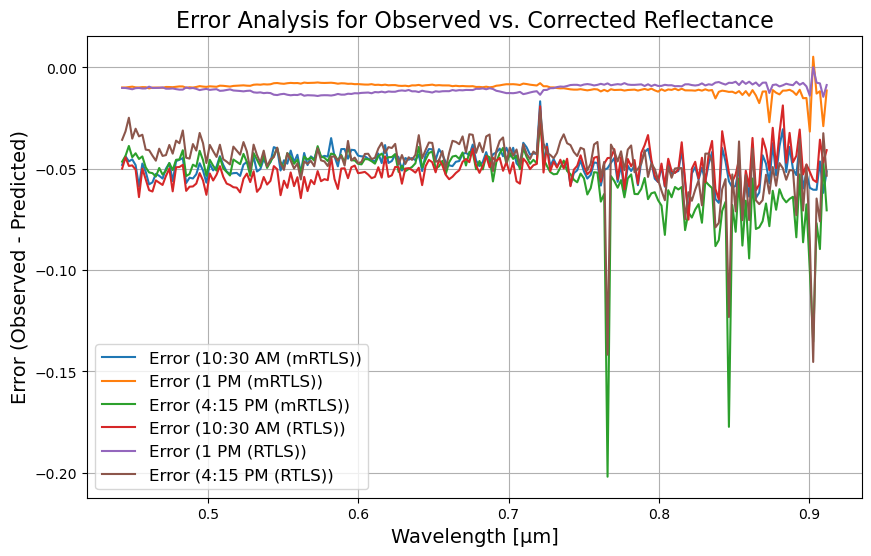

Error Metrics Summary:
10:30 AM (mRTLS): MAE = 0.0481, RMSE = 0.0487, MBE = -0.0481
1 PM (mRTLS): MAE = 0.0101, RMSE = 0.0105, MBE = -0.0101
4:15 PM (mRTLS): MAE = 0.0551, RMSE = 0.0583, MBE = -0.0551
10:30 AM (RTLS): MAE = 0.0506, RMSE = 0.0512, MBE = -0.0506
1 PM (RTLS): MAE = 0.0105, RMSE = 0.0107, MBE = -0.0105
4:15 PM (RTLS): MAE = 0.0471, RMSE = 0.0494, MBE = -0.0471

Percentage RMSE Reductions:
10:30 AM: Percentage RMSE Reduction = 4.94%
1 PM: Percentage RMSE Reduction = 1.85%
4:15 PM: Percentage RMSE Reduction = -18.00%


In [430]:
# Error metrics functions
def calculate_errors(observed, predicted):
    errors = observed - predicted
    mae = np.mean(np.abs(errors))
    rmse = np.sqrt(np.mean(errors**2))
    mbe = np.mean(errors)
    return errors, mae, rmse, mbe

# Error analysis
datasets = {
    "10:30 AM (mRTLS)": brdf_with_interaction_1[:-10],
    "1 PM (mRTLS)": brdf_with_interaction_2[:-10],
    "4:15 PM (mRTLS)": brdf_with_interaction_3[:-10],
    "10:30 AM (RTLS)": brdf_without_interaction_1[:-10],
    "1 PM (RTLS)": brdf_without_interaction_2[:-10],
    "4:15 PM (RTLS)": brdf_without_interaction_3[:-10],
}

# Calculate errors and store metrics
error_metrics = {}
percentage_rmse = {}

for label, predicted in datasets.items():
    errors, mae, rmse, mbe = calculate_errors(observed_reflect_2[:-10], predicted)
    error_metrics[label] = {"MAE": mae, "RMSE": rmse, "MBE": mbe}

# Calculate percentage RMSE for mRTLS compared to RTLS
for time in ["10:30 AM", "1 PM", "4:15 PM"]:
    mRTLS_key = f"{time} (mRTLS)"
    RTLS_key = f"{time} (RTLS)"
    if RTLS_key in error_metrics and mRTLS_key in error_metrics:
        rmse_mRTLS = error_metrics[mRTLS_key]["RMSE"]
        rmse_RTLS = error_metrics[RTLS_key]["RMSE"]
        percentage_decrease = ((rmse_RTLS - rmse_mRTLS) / rmse_RTLS) * 100 if rmse_RTLS != 0 else 0
        percentage_rmse[time] = percentage_decrease

# Plot error curves
plt.figure(figsize=(10, 6))
for label, predicted in datasets.items():
    errors, _, _, _ = calculate_errors(observed_reflect_2[:-10], predicted)
    plt.plot(wavelengths_2, errors, label=f"Error ({label})")

plt.xlabel("Wavelength [µm]", fontsize=14)
plt.ylabel("Error (Observed - Predicted)", fontsize=14)
plt.title("Error Analysis for Observed vs. Corrected Reflectance", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig(f"{output_directory}error_analysis.png", dpi=600)
plt.show()

# Print error metrics
print("Error Metrics Summary:")
for label, metrics in error_metrics.items():
    print(f"{label}: MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}, MBE = {metrics['MBE']:.4f}")

# Print percentage RMSE reductions
print("\nPercentage RMSE Reductions:")
for time, reduction in percentage_rmse.items():
    print(f"{time}: Percentage RMSE Reduction = {reduction:.2f}%")


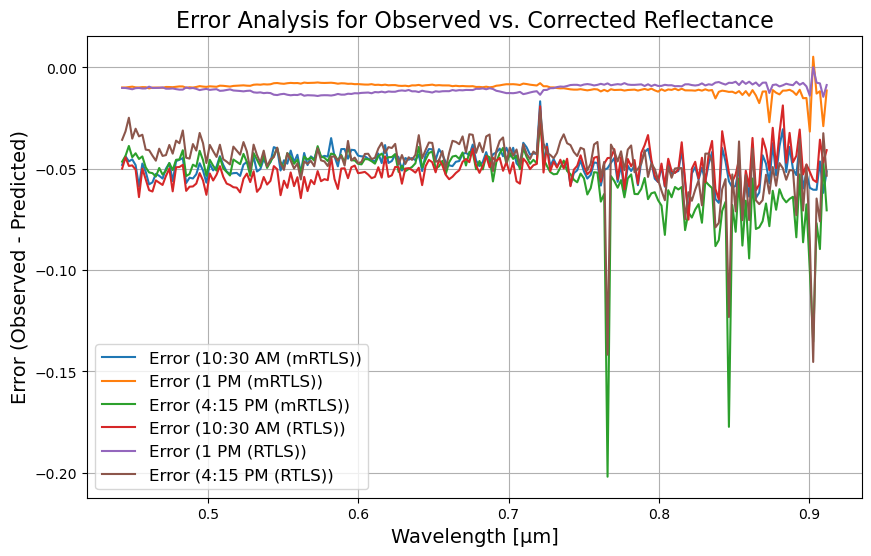

Error Metrics Summary:
10:30 AM (mRTLS): MAE = 0.0481, RMSE = 0.0487, MBE = -0.0481
1 PM (mRTLS): MAE = 0.0101, RMSE = 0.0105, MBE = -0.0101
4:15 PM (mRTLS): MAE = 0.0551, RMSE = 0.0583, MBE = -0.0551
10:30 AM (RTLS): MAE = 0.0506, RMSE = 0.0512, MBE = -0.0506
1 PM (RTLS): MAE = 0.0105, RMSE = 0.0107, MBE = -0.0105
4:15 PM (RTLS): MAE = 0.0471, RMSE = 0.0494, MBE = -0.0471

Percentage RMSE Reductions:
10:30 AM: Percentage RMSE Reduction = 4.94%
1 PM: Percentage RMSE Reduction = 1.85%
4:15 PM: Percentage RMSE Reduction = -18.00%

Percentage RMSE for Each Model:
10:30 AM (mRTLS): Percentage RMSE = 95.53%
1 PM (mRTLS): Percentage RMSE = 20.66%
4:15 PM (mRTLS): Percentage RMSE = 114.38%
10:30 AM (RTLS): Percentage RMSE = 100.49%
1 PM (RTLS): Percentage RMSE = 21.05%
4:15 PM (RTLS): Percentage RMSE = 96.93%


In [431]:
# Error metrics functions
def calculate_errors(observed, predicted):
    errors = observed - predicted
    mae = np.mean(np.abs(errors))
    rmse = np.sqrt(np.mean(errors**2))
    mbe = np.mean(errors)
    return errors, mae, rmse, mbe

# Error analysis
datasets = {
    "10:30 AM (mRTLS)": brdf_with_interaction_1[:-10],
    "1 PM (mRTLS)": brdf_with_interaction_2[:-10],
    "4:15 PM (mRTLS)": brdf_with_interaction_3[:-10],
    "10:30 AM (RTLS)": brdf_without_interaction_1[:-10],
    "1 PM (RTLS)": brdf_without_interaction_2[:-10],
    "4:15 PM (RTLS)": brdf_without_interaction_3[:-10],
}

# Calculate errors and store metrics
error_metrics = {}
percentage_rmse = {}
percentage_rmse_models = {}

for label, predicted in datasets.items():
    errors, mae, rmse, mbe = calculate_errors(observed_reflect_2[:-10], predicted)
    error_metrics[label] = {"MAE": mae, "RMSE": rmse, "MBE": mbe}

# Calculate percentage RMSE for mRTLS compared to RTLS
for time in ["10:30 AM", "1 PM", "4:15 PM"]:
    mRTLS_key = f"{time} (mRTLS)"
    RTLS_key = f"{time} (RTLS)"
    if RTLS_key in error_metrics and mRTLS_key in error_metrics:
        rmse_mRTLS = error_metrics[mRTLS_key]["RMSE"]
        rmse_RTLS = error_metrics[RTLS_key]["RMSE"]
        percentage_decrease = ((rmse_RTLS - rmse_mRTLS) / rmse_RTLS) * 100 if rmse_RTLS != 0 else 0
        percentage_rmse[time] = percentage_decrease

# Calculate percentage RMSE for each model relative to observed reflectance
for label, metrics in error_metrics.items():
    rmse = metrics["RMSE"]
    observed_mean = np.mean(observed_reflect_2[:-10])
    percentage_rmse_models[label] = (rmse / observed_mean) * 100 if observed_mean != 0 else 0

# Plot error curves
plt.figure(figsize=(10, 6))
for label, predicted in datasets.items():
    errors, _, _, _ = calculate_errors(observed_reflect_2[:-10], predicted)
    plt.plot(wavelengths_2, errors, label=f"Error ({label})")

plt.xlabel("Wavelength [µm]", fontsize=14)
plt.ylabel("Error (Observed - Predicted)", fontsize=14)
plt.title("Error Analysis for Observed vs. Corrected Reflectance", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig(f"{output_directory}error_analysis.png", dpi=600)
plt.show()

# Print error metrics
print("Error Metrics Summary:")
for label, metrics in error_metrics.items():
    print(f"{label}: MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}, MBE = {metrics['MBE']:.4f}")

# Print percentage RMSE reductions
print("\nPercentage RMSE Reductions:")
for time, reduction in percentage_rmse.items():
    print(f"{time}: Percentage RMSE Reduction = {reduction:.2f}%")

# Print percentage RMSE for each model
print("\nPercentage RMSE for Each Model:")
for label, percentage in percentage_rmse_models.items():
    print(f"{label}: Percentage RMSE = {percentage:.2f}%")


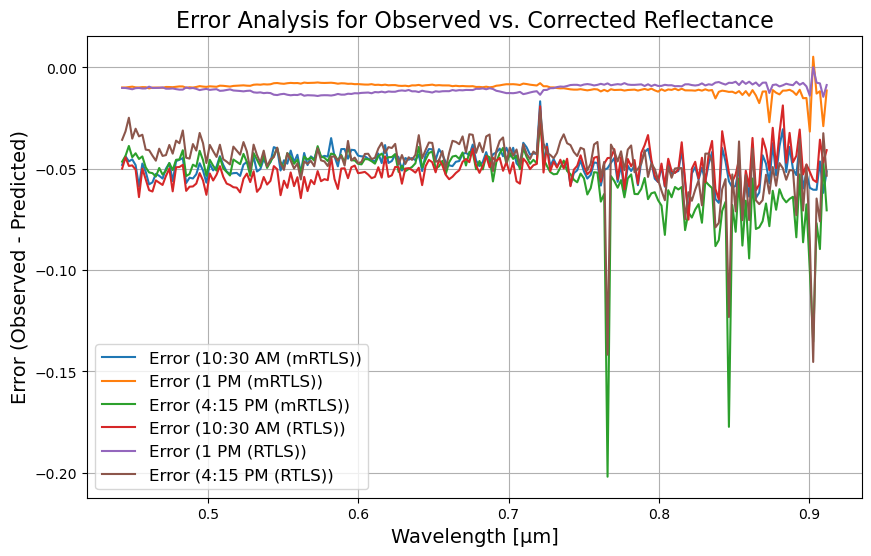

Error Metrics Summary:
10:30 AM (mRTLS): MAE = 0.0481, RMSE = 0.0487, MBE = -0.0481
1 PM (mRTLS): MAE = 0.0101, RMSE = 0.0105, MBE = -0.0101
4:15 PM (mRTLS): MAE = 0.0551, RMSE = 0.0583, MBE = -0.0551
10:30 AM (RTLS): MAE = 0.0506, RMSE = 0.0512, MBE = -0.0506
1 PM (RTLS): MAE = 0.0105, RMSE = 0.0107, MBE = -0.0105
4:15 PM (RTLS): MAE = 0.0471, RMSE = 0.0494, MBE = -0.0471

Percentage RMSE Reductions:
10:30 AM: Percentage RMSE Reduction = 4.94%
1 PM: Percentage RMSE Reduction = 1.85%
4:15 PM: Percentage RMSE Reduction = -18.00%

Percentage RMSE for Each Model:
10:30 AM (mRTLS): Percentage RMSE = 95.53%
1 PM (mRTLS): Percentage RMSE = 20.66%
4:15 PM (mRTLS): Percentage RMSE = 114.38%
10:30 AM (RTLS): Percentage RMSE = 100.49%
1 PM (RTLS): Percentage RMSE = 21.05%
4:15 PM (RTLS): Percentage RMSE = 96.93%

RMSE Comparisons for mRTLS:
10:30 AM compared to 1 PM: RMSE Difference = 362.46%
4:15 PM compared to 1 PM: RMSE Difference = 453.73%


In [432]:
# Error metrics functions
def calculate_errors(observed, predicted):
    errors = observed - predicted
    mae = np.mean(np.abs(errors))
    rmse = np.sqrt(np.mean(errors**2))
    mbe = np.mean(errors)
    return errors, mae, rmse, mbe

# Error analysis
datasets = {
    "10:30 AM (mRTLS)": brdf_with_interaction_1[:-10],
    "1 PM (mRTLS)": brdf_with_interaction_2[:-10],
    "4:15 PM (mRTLS)": brdf_with_interaction_3[:-10],
    "10:30 AM (RTLS)": brdf_without_interaction_1[:-10],
    "1 PM (RTLS)": brdf_without_interaction_2[:-10],
    "4:15 PM (RTLS)": brdf_without_interaction_3[:-10],
}

# Calculate errors and store metrics
error_metrics = {}
percentage_rmse = {}
percentage_rmse_models = {}

for label, predicted in datasets.items():
    errors, mae, rmse, mbe = calculate_errors(observed_reflect_2[:-10], predicted)
    error_metrics[label] = {"MAE": mae, "RMSE": rmse, "MBE": mbe}

# Compare 10:30 AM and 4:15 PM RMSE with 1 PM RMSE for mRTLS
mRTLS_comparison = {}
for time in ["10:30 AM", "4:15 PM"]:
    mRTLS_key = f"{time} (mRTLS)"
    reference_key = "1 PM (mRTLS)"
    if mRTLS_key in error_metrics and reference_key in error_metrics:
        rmse_time = error_metrics[mRTLS_key]["RMSE"]
        rmse_reference = error_metrics[reference_key]["RMSE"]
        percentage_difference = ((rmse_time - rmse_reference) / rmse_reference) * 100 if rmse_reference != 0 else 0
        mRTLS_comparison[time] = percentage_difference

# Calculate percentage RMSE for mRTLS compared to RTLS
for time in ["10:30 AM", "1 PM", "4:15 PM"]:
    mRTLS_key = f"{time} (mRTLS)"
    RTLS_key = f"{time} (RTLS)"
    if RTLS_key in error_metrics and mRTLS_key in error_metrics:
        rmse_mRTLS = error_metrics[mRTLS_key]["RMSE"]
        rmse_RTLS = error_metrics[RTLS_key]["RMSE"]
        percentage_decrease = ((rmse_RTLS - rmse_mRTLS) / rmse_RTLS) * 100 if rmse_RTLS != 0 else 0
        percentage_rmse[time] = percentage_decrease

# Calculate percentage RMSE for each model relative to observed reflectance
for label, metrics in error_metrics.items():
    rmse = metrics["RMSE"]
    observed_mean = np.mean(observed_reflect_2[:-10])
    percentage_rmse_models[label] = (rmse / observed_mean) * 100 if observed_mean != 0 else 0

# Plot error curves
plt.figure(figsize=(10, 6))
for label, predicted in datasets.items():
    errors, _, _, _ = calculate_errors(observed_reflect_2[:-10], predicted)
    plt.plot(wavelengths_2, errors, label=f"Error ({label})")

plt.xlabel("Wavelength [µm]", fontsize=14)
plt.ylabel("Error (Observed - Predicted)", fontsize=14)
plt.title("Error Analysis for Observed vs. Corrected Reflectance", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig(f"{output_directory}error_analysis.png", dpi=600)
plt.show()

# Print error metrics
print("Error Metrics Summary:")
for label, metrics in error_metrics.items():
    print(f"{label}: MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}, MBE = {metrics['MBE']:.4f}")

# Print percentage RMSE reductions
print("\nPercentage RMSE Reductions:")
for time, reduction in percentage_rmse.items():
    print(f"{time}: Percentage RMSE Reduction = {reduction:.2f}%")

# Print percentage RMSE for each model
print("\nPercentage RMSE for Each Model:")
for label, percentage in percentage_rmse_models.items():
    print(f"{label}: Percentage RMSE = {percentage:.2f}%")

# Print RMSE comparisons for mRTLS
print("\nRMSE Comparisons for mRTLS:")
for time, difference in mRTLS_comparison.items():
    print(f"{time} compared to 1 PM: RMSE Difference = {difference:.2f}%")


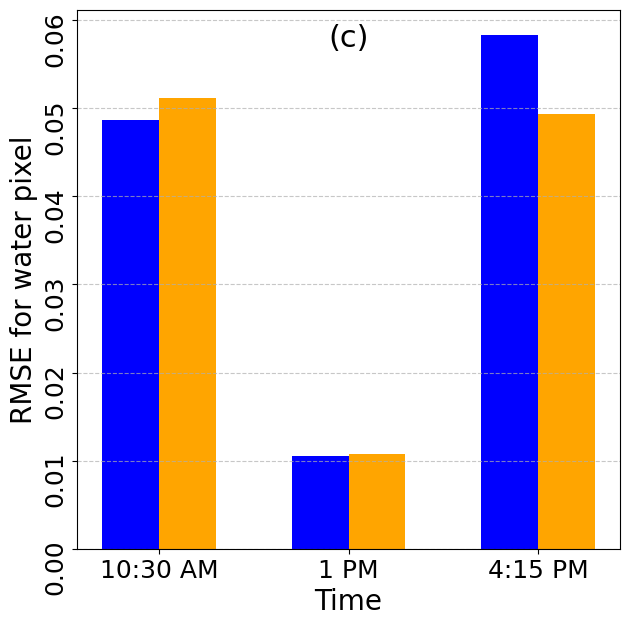

In [433]:
# Prepare data for RMSE bar plot
methods = ['10:30 AM', '1 PM', '4:15 PM']
mRTLS_rmse = [
    error_metrics["10:30 AM (mRTLS)"]["RMSE"],
    error_metrics["1 PM (mRTLS)"]["RMSE"],
    error_metrics["4:15 PM (mRTLS)"]["RMSE"]
]
RTLS_rmse = [
    error_metrics["10:30 AM (RTLS)"]["RMSE"],
    error_metrics["1 PM (RTLS)"]["RMSE"],
    error_metrics["4:15 PM (RTLS)"]["RMSE"]
]

x = np.arange(len(methods))  # Positions for bars
width = 0.3  # Width of the bars

# Plotting RMSE
plt.figure(figsize=(7, 7))
plt.bar(x - width / 2, mRTLS_rmse, width, label='mRTLS', color='blue')
plt.bar(x + width / 2, RTLS_rmse, width, label='RTLS', color='orange')

# Adding labels and title
plt.ylabel('RMSE for water pixel', fontsize=20)
plt.xlabel('Time', fontsize=20)
#plt.title('RMSE Comparison', fontsize=14)
plt.xticks(x, methods, fontsize=18)
plt.yticks(fontsize=18, rotation = 90)

#plt.legend(fontsize=22)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.text(0.5, 0.92, '(c)', transform=plt.gca().transAxes, fontsize=22, 
         verticalalignment='bottom', horizontalalignment='center', color='black')
# Save or display the plot
plt.savefig(f"{output_directory}rmse_water_comparison.png", dpi=1200)
plt.show()


In [137]:
import pandas as pd
# File path for the CSV
veg_10am = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/veg_10am.csv'
veg_1pm = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/veg_1pm.csv'
veg_4pm = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/veg_4pm.csv'

# Read the CSV file into a DataFrame
veg_10am = pd.read_csv(veg_10am)
veg_1pm = pd.read_csv(veg_1pm)
veg_4pm = pd.read_csv(veg_4pm)

# Display the contents of the DataFrame
print(veg_10am)

# Access specific columns or rows if needed
# Example: Print the first 5 rows
print(df_plot_values.head())

# Example: Access the Wavelength column
wavelengths = df_plot_values["Wavelength [µm]"]
print(wavelengths)


     Wavelength [µm]  $f_{iso}$  $f_{vol}$  $f_{geo}$  $f_{int}$
0           0.442746   0.025638   0.083159   0.090308   0.000743
1           0.444990   0.023426   0.082654   0.090017  -0.002233
2           0.447234   0.024145   0.082821   0.090113  -0.001251
3           0.449478   0.024812   0.082972   0.090200  -0.000361
4           0.451722   0.024549   0.082911   0.090165  -0.000719
..               ...        ...        ...        ...        ...
205         0.902769   0.135935   0.108138   0.104684   0.147968
206         0.905013   0.138434   0.108705   0.105010   0.151305
207         0.907257   0.133388   0.107562   0.104352   0.144569
208         0.909501   0.138935   0.108818   0.105075   0.151976
209         0.911745   0.132185   0.107290   0.104195   0.142965

[210 rows x 5 columns]
   Wavelength [µm]  $f_{iso}$  $f_{vol}$  $f_{geo}$  $f_{int}$
0         0.442746   0.012064   0.052285   0.097205  -0.003041
1         0.444990   0.011970   0.052237   0.097202  -0.003152
2      

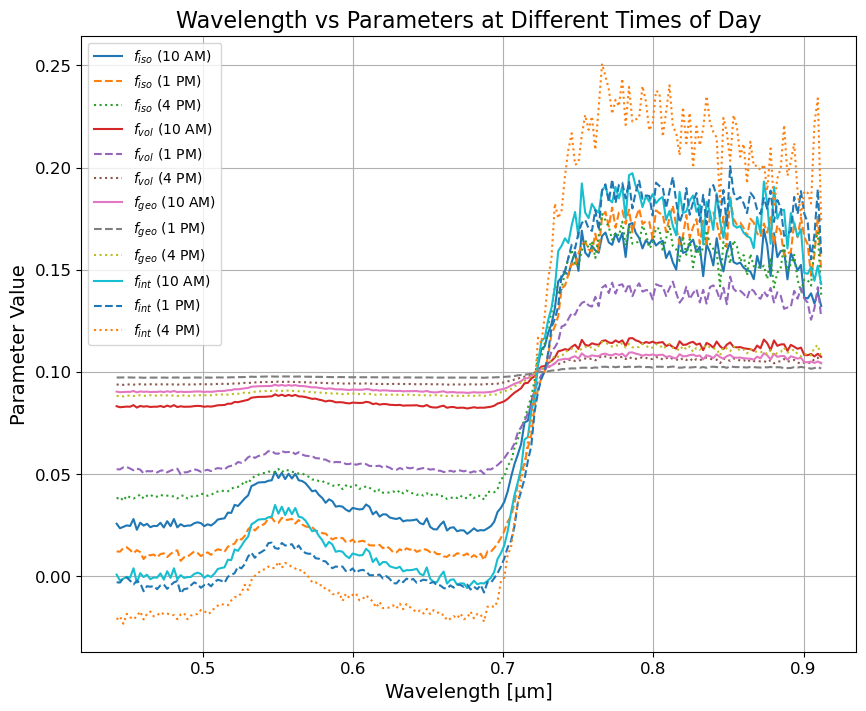

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

# File paths for the CSV files
veg_10am_path = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/veg_10am.csv'
veg_1pm_path = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/veg_1pm.csv'
veg_4pm_path = 'C:/Users/Say70/OneDrive - Mississippi State University/Desktop/UAS data collection/SurajTest/New/veg_4pm.csv'

# Read the CSV files into DataFrames
veg_10am = pd.read_csv(veg_10am_path)
veg_1pm = pd.read_csv(veg_1pm_path)
veg_4pm = pd.read_csv(veg_4pm_path)

# Extract wavelength and parameter columns
wavelength_10am = veg_10am["Wavelength [µm]"]
wavelength_1pm = veg_1pm["Wavelength [µm]"]
wavelength_4pm = veg_4pm["Wavelength [µm]"]

parameters_10am = veg_10am.drop(columns=["Wavelength [µm]"])
parameters_1pm = veg_1pm.drop(columns=["Wavelength [µm]"])
parameters_4pm = veg_4pm.drop(columns=["Wavelength [µm]"])

# Plot the data
plt.figure(figsize=(10, 8))

# Plot parameters for each dataset
for col in parameters_10am.columns:
    plt.plot(wavelength_10am, parameters_10am[col], label=f'{col} (10 AM)', linestyle='-')
    plt.plot(wavelength_1pm, parameters_1pm[col], label=f'{col} (1 PM)', linestyle='--')
    plt.plot(wavelength_4pm, parameters_4pm[col], label=f'{col} (4 PM)', linestyle=':')

# Customize the plot
plt.xlabel('Wavelength [µm]', fontsize=14)
plt.ylabel('Parameter Value', fontsize=14)
plt.title('Wavelength vs Parameters at Different Times of Day', fontsize=16)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.tick_params(axis='both', labelsize=12)

# Save the plot (optional)
# plt.savefig('wavelength_vs_parameters.png', dpi=300)

plt.show()
